# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


# DDPG
DDPG: Deep Deterministic Policy Gradient (DDPG) algorithm, is an off-policy algorithm and a good fit for continuous action spaces such as our current environment

In [5]:
# Import the agent and other models
import matplotlib.pyplot as plt
import torch
from collections import deque

# from agent import *
from agent2 import *

In [6]:
random_seed = 2

In [7]:
# Define the DDPG Loop
def ddpg(n_episodes=5000, print_every=100):
    # Load the agent
    num_agents = 2
    multi_agent = MADDPG(num_agents, state_size, action_size, random_seed)

    scores_deque = deque(maxlen=print_every)
    scores = []
    max_scores = [] # Maximum score for each episode across all agents
    min_scores = [] # Minimum score for each episode across all agents
    std_scores = [] # Standard deviation of scores for each episode across all agents

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations 
        multi_agent.reset()
        scores_agents = np.zeros(states.shape[0]) 
        t_step = 0
        while True:
            actions = multi_agent.act(states)                       
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations      
            rewards = env_info.rewards                      
            dones = env_info.local_done                     
            scores_agents += env_info.rewards                    
            t_step += 1
            multi_agent.step(states, actions, rewards, next_states, dones)
            states = next_states                              
            if np.any(dones):                                 
                break
        scores_deque.append(np.mean(scores_agents))
        scores.append(np.mean(scores_agents))
        max_scores.append(np.max(scores_agents))
        min_scores.append(np.min(scores_agents))
        std_scores.append(np.std(scores_agents))
        if i_episode % print_every == 0:
            print('\rEpisode {}; Average Score: {:.2f}; Current Score: {:.2f}; Max Score: {:.2f}; Min Score: {:.2f}; Score Std Dev: {:.2f}'.format(
            i_episode, np.mean(scores_deque), np.mean(scores_agents), np.max(scores_agents), np.min(scores_agents), np.std(scores_agents)))

        if i_episode % print_every == 0 or np.mean(scores_deque) > np.max(scores):
            multi_agent.save('tennis_actor', 'tennis_critic')
            
        if np.mean(scores_deque) > 0.5:
            print(f'Evironment Solved in {i_episode} episode')
            break

    return scores, max_scores, min_scores, std_scores


r seed is:  2
Episode 100; Average Score: -0.00; Current Score: -0.00; Max Score: 0.00; Min Score: -0.01; Score Std Dev: 0.00
Episode 200; Average Score: -0.00; Current Score: -0.00; Max Score: 0.00; Min Score: -0.01; Score Std Dev: 0.00
Episode 300; Average Score: -0.00; Current Score: -0.00; Max Score: 0.00; Min Score: -0.01; Score Std Dev: 0.00
Episode 400; Average Score: -0.00; Current Score: -0.00; Max Score: 0.00; Min Score: -0.01; Score Std Dev: 0.00
Episode 500; Average Score: -0.00; Current Score: -0.00; Max Score: 0.00; Min Score: -0.01; Score Std Dev: 0.00
Episode 600; Average Score: -0.00; Current Score: -0.00; Max Score: 0.00; Min Score: -0.01; Score Std Dev: 0.00
Episode 700; Average Score: -0.00; Current Score: -0.00; Max Score: 0.00; Min Score: -0.01; Score Std Dev: 0.00
Episode 800; Average Score: -0.00; Current Score: -0.00; Max Score: 0.00; Min Score: -0.01; Score Std Dev: 0.00
Episode 900; Average Score: -0.00; Current Score: -0.00; Max Score: 0.00; Min Score: -0.01

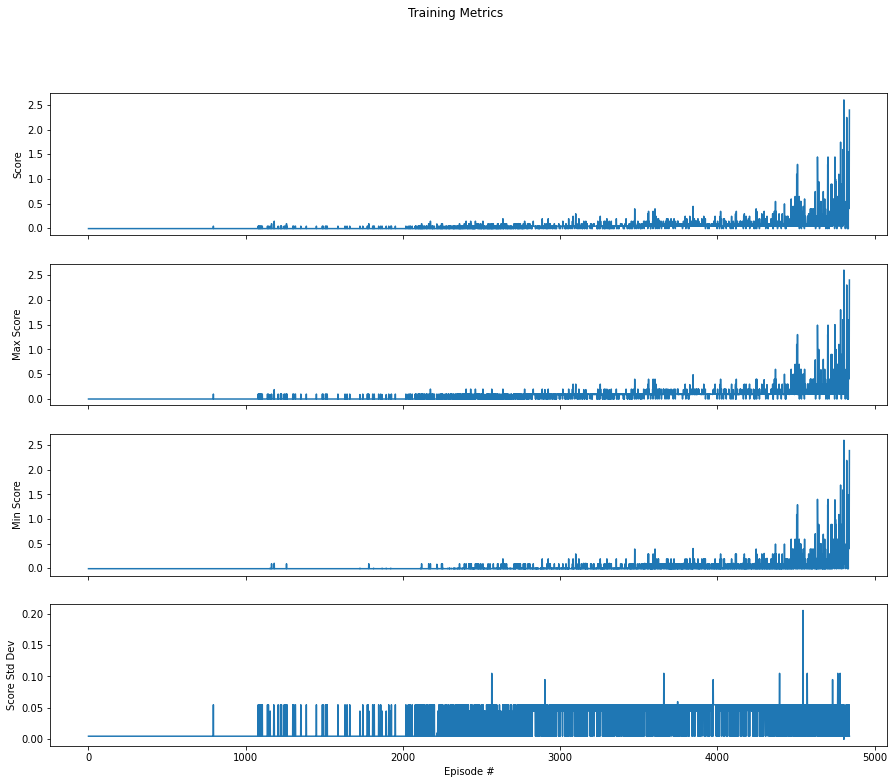

In [8]:
scores, max_scores, min_scores, std_scores = ddpg()

fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1, sharex=True, figsize=(15, 12))
fig.suptitle('Training Metrics')

ax1.plot(np.arange(1, len(scores)+1), scores)
ax1.set_ylabel('Score')

ax2.plot(np.arange(1, len(max_scores)+1), max_scores)
ax2.set_ylabel('Max Score')

ax3.plot(np.arange(1, len(min_scores)+1), min_scores)
ax3.set_ylabel('Min Score')

ax4.plot(np.arange(1, len(std_scores)+1), std_scores)
ax4.set_ylabel('Score Std Dev')
ax4.set_xlabel('Episode #')

# Save the figure
plt.savefig('training_metrics.png')
plt.show()

In [9]:
env.close() # Close the enivornment